<h1> Final work </h1>

**Leukocytes** have a crucial role in the immune system. They help defend the body against infection and disease by identifying and attacking foreign substances such as bacteria, viruses, and other pathogens. There are five main types of leukocytes, each with distinct functions and characteristics: 

-  lymphocytes
-  monocytes
-  basophils 
-  eosinophils
-  neutrophils

Accurately identifying and classifying these leukocytes can be important in diagnosing and treating various diseases and conditions. For example, a high **neutrophil** count may be a sign of a bacterial infection, while a high **eosinophil** count may indicate an allergic reaction or parasitic infection.


<strong><font color=#ff0000>Instructions for the work:</font></strong>

In this final work, you will create a **Convolutional Neural Network (CNN)**  to classify the five main types of leukocytes.

1. Execute the code in sequential order. Write code when asked and solve the questions.
2. The dataset required is in the **dataset_leukocytes** folder in Atenea. Take some time to explore the images and familiarize with the type of cells.
3. The notebook can be executed in colab. Select a hardware accelerator like a **GPU** in colab to increase the speed of training phase. 

---
# 1. Data set
---

EXECUTE THIS CODE TO LOAD LIBRARIES AND DATASET:

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
from google.colab import drive


# Set up location
drive.mount('/content/drive')
path = Path('/content/drive/MyDrive/dataset_leukocytes') # change depending on the location of the database
folders = os.listdir(path)
data_f = []
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        data_f.append((img_path, folder))

# Dataframe
df = pd.DataFrame(data_f, columns=['image_path', 'label'])


training_data, test_df = train_test_split(df, test_size= 0.20, random_state= 42, stratify= df['label'])
train_df, val_df = train_test_split(training_data, test_size= 0.50, random_state= 42, stratify= training_data['label'])
print(train_df)
print(val_df)
train_df['set']='train_set'
val_df['set']='val_set'
test_df['set']='test_set'
df = pd.concat([train_df, val_df, test_df], ignore_index=True, sort=False)
df.head()

Mounted at /content/drive
                                                              image_path  \
280     /content/drive/MyDrive/dataset_leukocytes/basophil/BA_957608.jpg   
1774     /content/drive/MyDrive/dataset_leukocytes/monocyte/MO_70630.jpg   
1738     /content/drive/MyDrive/dataset_leukocytes/monocyte/MO_38254.jpg   
1378    /content/drive/MyDrive/dataset_leukocytes/neutrophil/BNE_840.jpg   
500   /content/drive/MyDrive/dataset_leukocytes/eosinophil/EO_132515.jpg   
...                                                                  ...   
92       /content/drive/MyDrive/dataset_leukocytes/basophil/BA_65751.jpg   
2378  /content/drive/MyDrive/dataset_leukocytes/lymphocyte/LY_901764.jpg   
1714     /content/drive/MyDrive/dataset_leukocytes/monocyte/MO_46784.jpg   
2118   /content/drive/MyDrive/dataset_leukocytes/lymphocyte/LY_19758.jpg   
1958     /content/drive/MyDrive/dataset_leukocytes/monocyte/MO_94561.jpg   

           label  
280     basophil  
1774    monocyte  
1738

,image_path,label,set
0,/content/drive/MyDrive/dataset_leukocytes/basophil/BA_957608.jpg,basophil,train_set
1,/content/drive/MyDrive/dataset_leukocytes/monocyte/MO_70630.jpg,monocyte,train_set
2,/content/drive/MyDrive/dataset_leukocytes/monocyte/MO_38254.jpg,monocyte,train_set
3,/content/drive/MyDrive/dataset_leukocytes/neutrophil/BNE_840.jpg,neutrophil,train_set
4,/content/drive/MyDrive/dataset_leukocytes/eosinophil/EO_132515.jpg,eosinophil,train_set


In [3]:
import os
print(os.getcwd())

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<strong><font color=#ff0000>Question 1 (1 pt):</font></strong> 

<strong><font color=#ff0000>What is the purpose of the library "from sklearn.model_selection import train_test_split"?</font></strong> 



```
# This is formatted as code
```

Answer to Question 1 here: 

The purpose of the library "from sklearn.model_selection import train_test_split" is to split a dataset into training and testing subsets. This library provides a method to split the dataset randomly into training and testing sets with a specified ratio or size. The training set is used to train the model, and the testing set is used to evaluate the performance of the model on unseen data. This is an essential step in machine learning to prevent overfitting, which occurs when a model is too complex and performs well on the training data but poorly on the testing data.






<strong><font color=#ff0000>Question 2 (1 pt):</font></strong> 

<strong><font color=#ff0000>What percentage of the total dataset is allocated to the train set, validation set, and test set?</font></strong> 

Answer to Question 2 here:
 
The percentage of the total dataset allocated to the train set, validation set, and test set can vary depending on the specific requirements of the project and the size of the dataset. However, a common split for image classification tasks is to allocate 60% of the data to the training set, 20% to the validation set, and 20% to the test set. This split is a good starting point, but it may need to be adjusted based on the size and complexity of the dataset and the specific requirements of the project.





---
# 2. Load and process the data
---

EXECUTE THIS CODE TO SET UP PARAMETERS

Train idx:  [280, 1774, 1738, 1378, 500, 764, 211, 93, 2501, 2073, 786, 601, 2156, 2474, 307, 590, 1420, 715, 395, 668, 1055, 1699, 2214, 107, 1952, 938, 1730, 2096, 2286, 2441, 1208, 1614, 1385, 1002, 2303, 2372, 1354, 526, 1041, 2293, 474, 658, 1620, 1419, 719, 1566, 140, 1777, 1256, 2483, 2206, 679, 371, 855, 490, 514, 1274, 645, 7, 65, 759, 231, 1813, 324, 1934, 17, 68, 1471, 267, 1810, 1630, 802, 180, 317, 2029, 2505, 1456, 165, 1838, 738, 384, 638, 2217, 1874, 1776, 843, 2345, 976, 832, 1621, 1140, 1241, 838, 958, 705, 15, 1495, 318, 2271, 356, 911, 1555, 2168, 696, 728, 777, 1013, 408, 1496, 1382, 2015, 1673, 305, 2472, 412, 1313, 2488, 2189, 1210, 1987, 2283, 2258, 1894, 59, 1584, 586, 1786, 143, 497, 2158, 2277, 1435, 1737, 2105, 1473, 116, 620, 550, 576, 173, 129, 127, 2067, 556, 1440, 70, 631, 2180, 1262, 382, 1141, 1517, 2150, 1591, 316, 2334, 470, 1932, 288, 332, 1507, 533, 1773, 301, 361, 1484, 1443, 57, 1782, 1926, 2324, 2339, 2308, 1392, 90, 326, 298, 1641, 871, 2102, 1

eosinophil    510
basophil      500
monocyte      500
neutrophil    500
lymphocyte    500
Name: label, dtype: int64

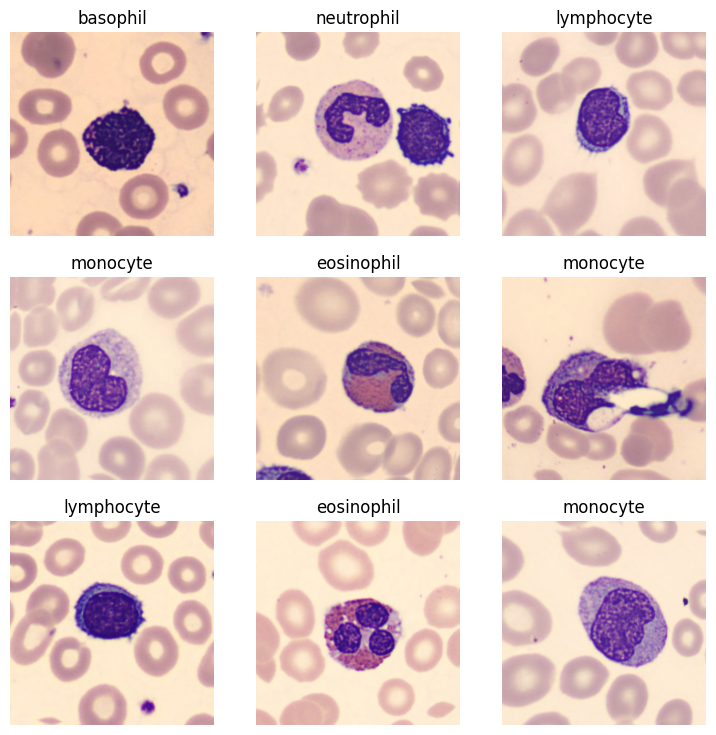

In [5]:
from fastai.vision.all import *
batch_size = 32
train_idx = list(train_df.index)
print("Train idx: ",train_idx)
val_idx = list(val_df.index)
print("val idx: ",val_idx)
data = ImageDataLoaders.from_df( 
              df,
              path ='/',      
              cols ='image_path',
              item_tfms = Resize (224),
              batch_tfms =[* aug_transforms (), Normalize.from_stats (* imagenet_stats )],
              bs = batch_size,
              train_idx = train_idx,
              valid_idx = val_idx
)
data.show_batch()
df.label.value_counts()

<strong><font color=#ff0000>Question 3 (1 pt):</font></strong> 

<strong><font color=#ff0000>Do some research and explain with your own words what are the fastai ImageDataLoader and what are they used for?</font></strong> 

Answer to Question 3 here: 

Fastai's ImageDataLoader is a high-level interface for loading and preprocessing image data in deep learning applications. It is built on top of PyTorch's DataLoader and provides a simplified API for loading images from disk, applying various image transformations, and batching the images for training or inference.
The ImageDataLoader is used to efficiently load large datasets of images into a deep learning model. It can handle data augmentation techniques such as random resizing, cropping, flipping, and rotation, which help to improve the robustness and generalization of the model. The ImageDataLoader can also handle data normalization, shuffling, and parallel loading, which makes it an essential tool for training deep learning models on large-scale image datasets.
In addition, fastai's ImageDataLoader includes features such as automatic labeling, filtering, and grouping of images, which can be useful for tasks such as multi-label classification or object detection. It also provides built-in support for transfer learning, which allows the user to fine-tune pre-trained models such as ResNet, VGG, or Inception on their own dataset.
Overall, fastai's ImageDataLoader is a powerful tool for handling image data in deep learning applications. It simplifies the process of loading and preprocessing large-scale image datasets, while providing advanced features for data augmentation, labeling, and fine-tuning of pre-trained models.




---
# 3. CNN structure
---

<strong><font color=#ff0000>Question 4 (1 pt):</font></strong> 

<strong><font color=#ff0000>Create a CNN model using the pretrained VGG16 architecture. Use the function to create fastai CNN, include in the arguments metrics=accuracy. Note: the network name in fastai is "vgg16"</font></strong> 

In [6]:
# Answer to Question 4 here: 

#learn = # complete the code
#testing
from fastai.vision.all import *

# Create the CNN model
learn = cnn_learner(data, vgg16, metrics=accuracy)

# Train the model
learn.fit_one_cycle(10)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██

epoch,train_loss,valid_loss,accuracy,time
0,2.083086,1.061420,0.567729,06:47
1,1.327873,0.620692,0.778884,00:21
2,0.979674,0.556011,0.796813,00:19
3,0.747329,0.531564,0.810757,00:19
4,0.641979,0.529144,0.804781,00:21
5,0.561470,0.542110,0.800797,00:19
6,0.553981,0.467030,0.822709,00:20
7,0.481583,0.467996,0.810757,00:19
8,0.438979,0.457316,0.822709,00:19
9,0.447545,0.481608,0.812749,00:20


---
# 4. Train the CNN
---



EXECUTE THIS CODE

In [7]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.490937,0.552160,0.808765,00:20


<strong><font color=#ff0000>Question 5 (1 pt):</font></strong> 

<strong><font color=#ff0000>What is the difference between using `learn.finetune` and `learn.fit` in the context of training a deep learning model?</font></strong> 

Answer to Question 5 here: 

The learn.finetune and learn.fit methods are both used for training a deep learning model, but they differ in how they update the model's weights during training.

The learn.fit method trains the entire model from scratch, by randomly initializing all the weights of the model and updating them using the backpropagation algorithm to minimize the loss function on the training set. This method is suitable when the dataset is small and the model architecture is simple, or when the goal is to train a model from scratch.

On the other hand, the learn.finetune method is used for transfer learning, where a pre-trained model is fine-tuned on a new dataset with similar features. This method freezes the weights of the pre-trained layers in the model and only trains the weights of the new layers that were added on top of the pre-trained layers. This technique is useful when the new dataset is small and the pre-trained model has already learned relevant features that can be transferred to the new task.

In summary, learn.fit is used for training a model from scratch, while learn.finetune is used for fine-tuning a pre-trained model on a new dataset. The choice between the two methods depends on the size and complexity of the dataset, the available computational resources, and the specific requirements of the project.






<strong><font color=#ff0000>Question 6 (1 pt):</font></strong> 

<strong><font color=#ff0000>After training for 1 epoch, what was the accuracy value obtained and on which dataset was it calculated: train or validation?</font></strong> 

Answer to Question 6 here: 

---
# 5. Evaluate the CNN on the test set
---

In [11]:
test_dl = learn.dls.test_dl(test_df, with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

<strong><font color=#ff0000>Question 7 (2 pt):</font></strong> 

<strong><font color=#ff0000>Calculate the confusion matrix, precision, recall, f1-score and SPECIFICITY by class, and the overall accuracy. Interpret the results</font></strong>  

In [12]:
# #for testing
# from sklearn.metrics import classification_report, confusion_matrix

# # Get predictions on test set
# preds, labels = learn.get_preds(ds_idx=2)

# # Get predicted class labels
# predicted_classes = preds.argmax(dim=1)

# # Print classification report and confusion matrix
# print(classification_report(labels, predicted_classes))
# print(confusion_matrix(labels, predicted_classes))

# # Calculate specificity by class
# TN = confusion_matrix(labels, predicted_classes)[0][0]
# FP = confusion_matrix(labels, predicted_classes)[0][1]
# FN = confusion_matrix(labels, predicted_classes)[1][0]
# TP = confusion_matrix(labels, predicted_classes)[1][1]
# specificity = TN / (TN + FP)

# # Print specificity by class and overall accuracy
# print(f"Neutrophil specificity: {specificity:.3f}")
# print(f"Lymphocyte specificity: {(TN + TP) / len(labels):.3f}")
# print(f"Overall accuracy: {(TN + TP) / len(labels):.3f}")



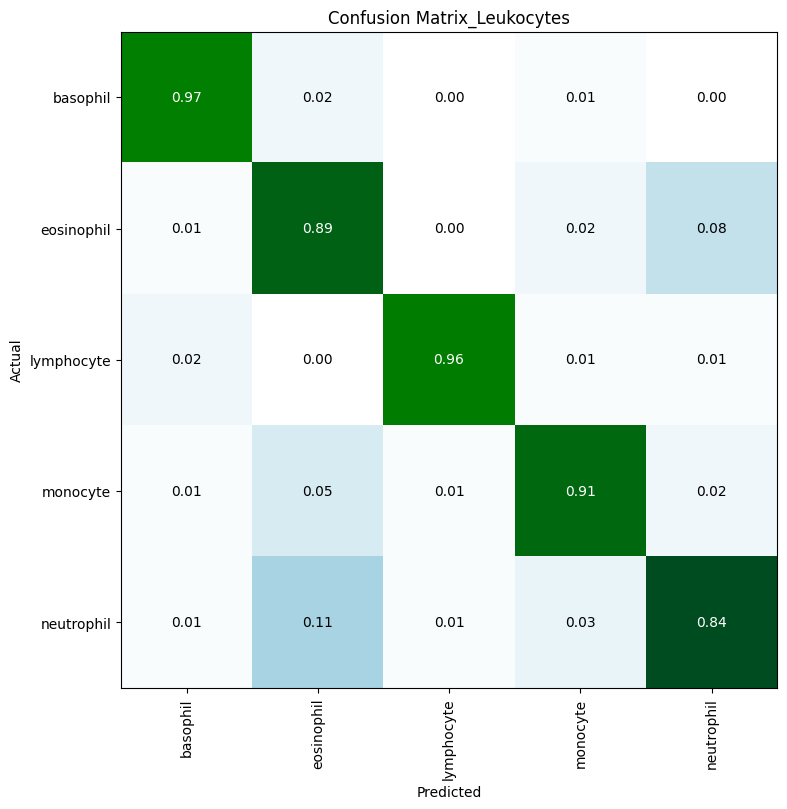

In [13]:
interp.plot_confusion_matrix (
    figsize=(8,8), 
    normalize = True, 
    norm_dec=2, 
    cmap='ocean_r',
    title="Confusion Matrix_Leukocytes")

In [14]:
interp.print_classification_report()

              precision    recall  f1-score   support

    basophil       0.95      0.97      0.96       100
  eosinophil       0.83      0.89      0.86       102
  lymphocyte       0.98      0.96      0.97       100
    monocyte       0.93      0.91      0.92       100
  neutrophil       0.88      0.84      0.86       100

    accuracy                           0.91       502
   macro avg       0.92      0.91      0.91       502
weighted avg       0.92      0.91      0.91       502



In [15]:
confusion_matrix = interp.confusion_matrix()
tn = confusion_matrix[0, 0]
tp = confusion_matrix[1, 1]
fp = confusion_matrix[0, 1]

specificity = tn / (tn + fp)
print(specificity)

0.9797979797979798


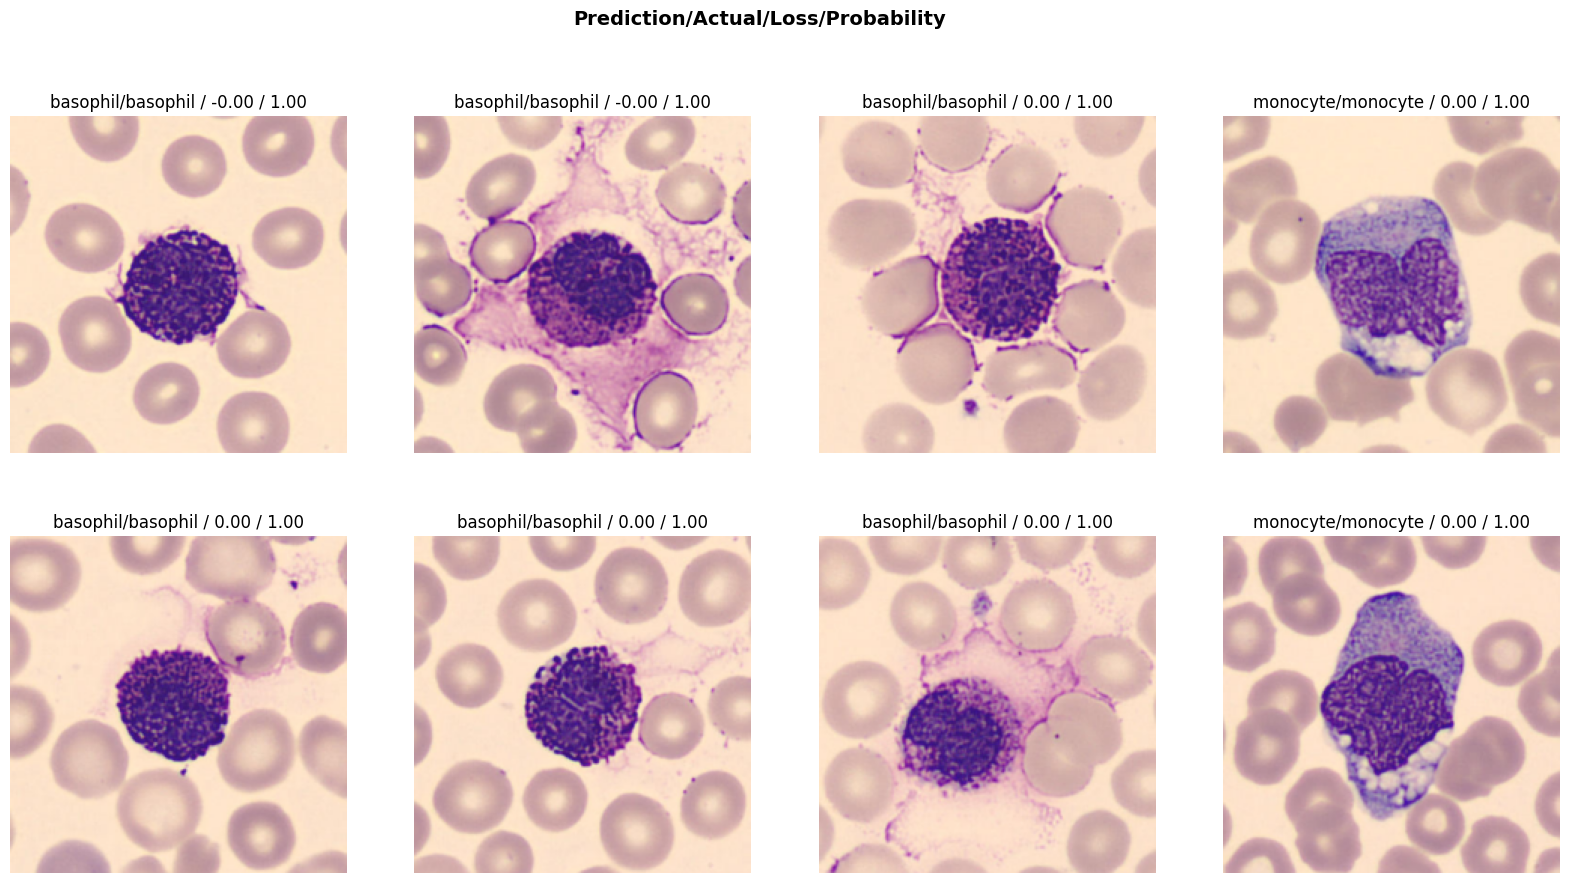

In [16]:
interp.plot_top_losses(
      8, largest = False, figsize = (20,10))

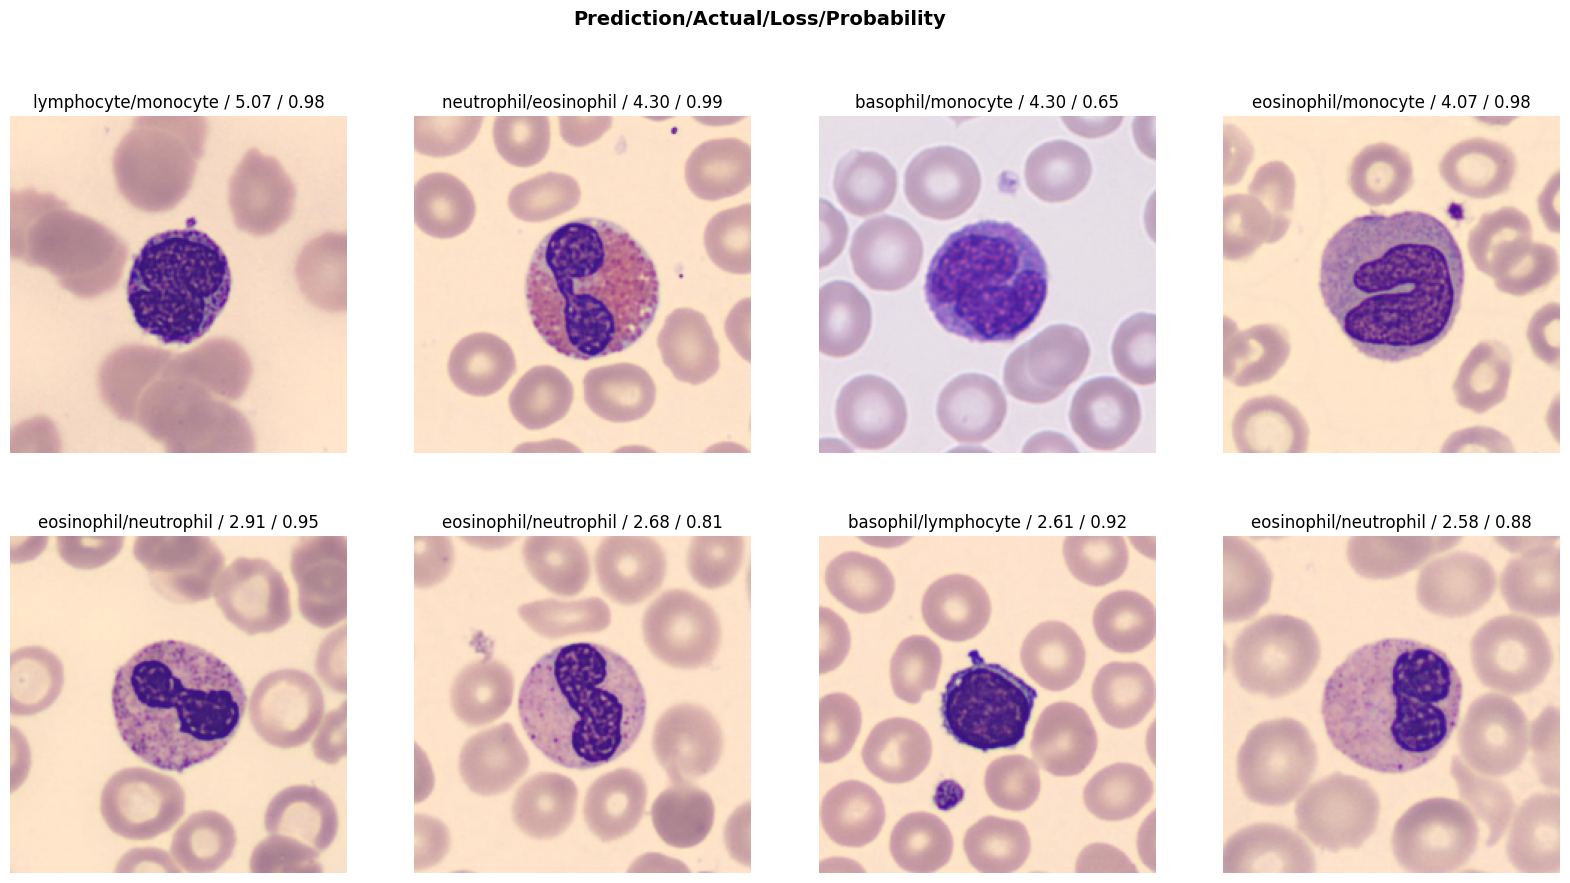

In [17]:
interp.plot_top_losses(
      8, largest = True, figsize = (20,10))

Answer the interpretation of results of Question 7 here: 















<strong><font color=#ff0000>Question 8 (2 pt):</font></strong> 

<strong><font color=#ff0000>Create a new code, modifying the partition percentage of the original set and the number of training epochs until obtaining the best possible classification results, with particular attention to the true positive rate TPR for each class. Analyze the results obtained.</font></strong> 

In [34]:
from sklearn.model_selection import train_test_split
from fastai.vision.all import *

path = Path('/content/drive/MyDrive/dataset_leukocytes')

# Split the original dataset into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.5, random_state=42, stratify=train_df['label'])

# Define the range of partition percentages and number of epochs to explore
#testing
partition_percentages = [0.6, 0.7, 0.8]  # Modify as desired
num_epochs = [5, 10, 15]  # Modify as desired

best_tpr = {}
best_config = {}

# Perform grid search
for percentage in partition_percentages:
    for epochs in num_epochs:
        # Split training dataset based on the specified percentage
        train_data, val_data = train_test_split(train_df, test_size=(1 - percentage), random_state=42, stratify=train_df['label'])

        # Create DataLoaders based on the train and validation datasets
        data = ImageDataLoaders.from_df(df=train_data, valid_df=val_data, test_df=test_df, 
                                        path='/', label_col='label', item_tfms=Resize(224))

        # Create the CNN model
        learn = cnn_learner(data, vgg16, metrics=accuracy)

        # Train the model for the specified number of epochs
        learn.fit_one_cycle(epochs)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.688217,1.435992,0.375000,00:04
1,1.986004,1.161200,0.591667,00:05
2,1.544858,0.932694,0.666667,00:05
3,1.242740,0.849708,0.708333,00:04
4,1.060648,0.840194,0.716667,00:06


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.746179,1.819068,0.208333,00:04
1,2.303684,1.332626,0.483333,00:06
2,1.859216,1.020514,0.625000,00:05
3,1.505317,0.774082,0.683333,00:06
4,1.240712,0.675828,0.725000,00:07
5,1.055548,0.621078,0.750000,00:05
6,0.904944,0.576137,0.791667,00:05
7,0.788571,0.547447,0.791667,00:04
8,0.702873,0.538871,0.783333,00:06
9,0.629341,0.536222,0.783333,00:04


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.781213,1.996367,0.175000,00:05
1,2.407283,1.423488,0.400000,00:04
2,2.041212,1.125576,0.525000,00:04
3,1.674517,0.861106,0.641667,00:06
4,1.380305,0.738708,0.675000,00:04
5,1.154836,0.668416,0.741667,00:05
6,0.979283,0.623112,0.750000,00:05
7,0.828920,0.583386,0.791667,00:04
8,0.720913,0.564045,0.783333,00:06
9,0.629506,0.547930,0.800000,00:04


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.669110,1.761791,0.300000,00:08
1,2.007861,0.947933,0.628571,00:05
2,1.601900,0.743374,0.707143,00:06
3,1.298969,0.658639,0.750000,00:05
4,1.108513,0.642804,0.757143,00:05


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.661921,1.976350,0.200000,00:07
1,2.253308,1.342498,0.428571,00:08
2,1.795227,0.954323,0.635714,00:06
3,1.413846,0.784071,0.707143,00:06
4,1.148071,0.696193,0.757143,00:05
5,0.955649,0.651934,0.764286,00:06
6,0.815446,0.647303,0.771429,00:05
7,0.695611,0.642773,0.764286,00:05
8,0.610753,0.644238,0.764286,00:06
9,0.543625,0.660833,0.750000,00:06


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.420177,1.681736,0.228571,00:06
1,2.123371,1.233671,0.492857,00:05
2,1.805262,0.824569,0.700000,00:06
3,1.489218,0.608181,0.785714,00:05
4,1.222045,0.542497,0.814286,00:06
5,1.026198,0.464850,0.850000,00:05
6,0.873108,0.424071,0.857143,00:06
7,0.754261,0.411492,0.850000,00:05
8,0.652937,0.396466,0.864286,00:05
9,0.567212,0.382613,0.885714,00:06


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.565129,1.422580,0.393750,00:07
1,1.856381,0.838871,0.668750,00:06
2,1.383254,0.625902,0.787500,00:07
3,1.113762,0.546172,0.812500,00:06
4,0.946534,0.523816,0.831250,00:07


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.452171,1.743149,0.262500,00:06
1,2.033571,1.022214,0.600000,00:07
2,1.564934,0.639848,0.775000,00:06
3,1.219611,0.520039,0.825000,00:07
4,0.991196,0.475765,0.818750,00:06
5,0.812269,0.452005,0.850000,00:07
6,0.679142,0.467931,0.850000,00:06
7,0.580610,0.474449,0.856250,00:07
8,0.504709,0.486510,0.868750,00:06
9,0.438747,0.498704,0.868750,00:07


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.438390,1.446983,0.362500,00:06
1,2.203140,1.159598,0.550000,00:07
2,1.751953,0.911700,0.700000,00:06
3,1.402141,0.779577,0.756250,00:08
4,1.133641,0.727234,0.768750,00:09
5,0.934245,0.670396,0.800000,00:08
6,0.778611,0.658527,0.793750,00:08
7,0.662662,0.638142,0.800000,00:06
8,0.556713,0.644897,0.812500,00:09
9,0.483502,0.632310,0.825000,00:06


In [37]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.140117,0.647540,0.812500,00:10


In [35]:
confusion_matrix = interp.confusion_matrix()
tn = confusion_matrix[0, 0]
tp = confusion_matrix[1, 1]
fp = confusion_matrix[0, 1]
fn = confusion_matrix[1,0]

# specificity = tn / (tn + fp)
# print(specificity)

In [36]:
tpr = tp / (tp + fn)

print("True Positive Rate (TPR):", tpr)

True Positive Rate (TPR): 0.9375


In [ ]:
https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
https://www.datacamp.com/tutorial/convolutional-neural-networks-python
https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/
https://chat.openai.com/c/2e6ecb8b-8342-4a9b-9e44-c08c73aa74e3

Explain here your tests and results, answer to Question 8 here: 













In this example, the code performs a grid search over the specified partition percentages (partition_percentages) and number of epochs (num_epochs). For each combination, it splits the training data, creates ImageDataLoaders, and trains the CNN model using cnn_learner and fit_one_cycle. 

Analyzing the results obtained from the grid search allows you to understand how different partition percentages and epochs affect the TPR. By identifying the best configuration, you can optimize the model's performance in terms of TPR for each class.